# Artificial Neural Network for Customer's Exit Prediction from Bank

Customer Churn Prediction:

Predict whether a customer will leave the Bank or not

### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
filepath = r"C:\Users\K Sharanya\Desktop\Projects\Customer Churn Prediction from Bank\Churn Modelling dataset.csv"
dataset = pd.read_csv(filepath)

Considering only the required columns in X and Exited column only in y:

In [4]:
# Create dummy variables for 'Geography' and 'Gender' and drop the first category
states = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

# Concatenate the dummy variables with the original dataset
dataset = pd.concat([dataset, states, gender], axis=1)

# Drop the original 'Geography' and 'Gender' columns as they are no longer required
dataset = dataset.drop(['Geography', 'Gender'], axis=1)

# Create feature matrix X and target vector y
X = dataset.iloc[:, 3:11].values
y = dataset.iloc[:, 11].values

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Converting to same unit using standard scaler library:

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ANN

In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

# Initialising the ANN
classifier = Sequential()

# Defining input layer
classifier.add(Input(shape=(8,)))

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

Check the no. of neurons present in each layer:

In [15]:
classifier.summary()   

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7973 - loss: 0.5688
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4423
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.4303
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8219 - loss: 0.4296
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8275 - loss: 0.4218
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8365 - loss: 0.4085
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4229
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4091
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8351 - loss: 0.4039
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8290 - loss: 0.4139
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.4094
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8313 - loss: 0.4012
Epoch 69/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8444 - loss: 0.3870
Epoch 70/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8297 - loss: 0.4079
Epoch 71/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.4061
Epoch 72/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8350 - loss: 0.3986
Epoch 73/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 0.4098
Epoch 74/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8354 - loss: 0.3979
Epoch 75/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.8255 - loss: 0.4149
Epoch 76/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8327 - loss: 0.4005
Epoch 77/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8337 - loss: 0.3967
Epoch 78/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8383 - loss: 0.3918
Epoch 79/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1

In [18]:
print(X_train.shape)

(8000, 8)


### Make predictions and Evaluate the Model

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)      # for binary classification
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[1557,   38],
       [ 288,  117]], dtype=int64)

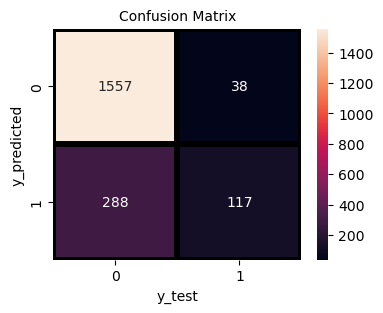

In [21]:
# Confusion Matrix plot
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.title("Confusion Matrix",fontsize=10)
plt.show()

In [22]:
# accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.837

In [25]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1595
           1       0.75      0.29      0.42       405

    accuracy                           0.84      2000
   macro avg       0.80      0.63      0.66      2000
weighted avg       0.83      0.84      0.81      2000

